In [19]:
import os
from qiskit import QuantumCircuit
from qiskit.circuit.random import random_circuit
from qiskit.visualization import plot_histogram

from braket.tracking import Tracker

from qiskit_braket_provider import BraketLocalBackend, BraketProvider, to_braket
# Use Braket SDK Cost Tracking to estimate the cost to run this example
t = Tracker().start()

os.environ['AWS_DEFAULT_REGION'] = 'us-east-1'

In [20]:
provider = BraketProvider()
backends = provider.backends()
print(backends)
# print(provider.backends("Aria 1"))

# online_simulators_backends = provider.backends(statuses=["ONLINE"], types=["SIMULATOR"])
# online_simulators_backends

[]


In [6]:
local_simulator = BraketLocalBackend()
local_simulator

BraketBackend[default]

In [9]:
from qiskit_braket_provider import BraketProvider

provider = BraketProvider()

# devices
# ionq_device = provider.get_backend("IonQ Device")

rigetti_device = provider.get_backend("Aspen-M-1")

oqc_device = provider.get_backend("Lucy")


QiskitBackendNotFoundError: 'No backend matches the criteria'

In [26]:
Aria_1 = provider.get_backend("Aria 1")

/beegfs/home/lungyi45/.conda/envs/qmg/lib/python3.10/site-packages/braket/aws/aws_device.py:660: UserWarning: AccessDeniedException: Unable to search region 'us-east-1' for devices. Please check your settings or try again later. Continuing without devices in 'us-east-1'.
  warnings.warn(
/beegfs/home/lungyi45/.conda/envs/qmg/lib/python3.10/site-packages/braket/aws/aws_device.py:660: UserWarning: AccessDeniedException: Unable to search region 'us-west-1' for devices. Please check your settings or try again later. Continuing without devices in 'us-west-1'.
  warnings.warn(
/beegfs/home/lungyi45/.conda/envs/qmg/lib/python3.10/site-packages/braket/aws/aws_device.py:660: UserWarning: AccessDeniedException: Unable to search region 'us-west-2' for devices. Please check your settings or try again later. Continuing without devices in 'us-west-2'.
  warnings.warn(
/beegfs/home/lungyi45/.conda/envs/qmg/lib/python3.10/site-packages/braket/aws/aws_device.py:660: UserWarning: AccessDeniedException: 

QiskitBackendNotFoundError: 'No backend matches the criteria'

In [31]:
from qiskit.qasm3 import dumps

In [30]:
online_simulators_backends = provider.backends(statuses=["ONLINE"], types=["SIMULATOR"])
online_simulators_backends

/beegfs/home/lungyi45/.conda/envs/qmg/lib/python3.10/site-packages/braket/aws/aws_device.py:660: UserWarning: AccessDeniedException: Unable to search region 'us-east-1' for devices. Please check your settings or try again later. Continuing without devices in 'us-east-1'.
  warnings.warn(


[]

In [29]:
task = local_simulator.run(circuit, shots=10)
results = task.result()
plot_histogram(results.get_counts())

TranspilerError: "The control-flow construct 'if_else' is not supported by the backend."

/beegfs/home/lungyi45/.conda/envs/qmg-gpu/lib/python3.8/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


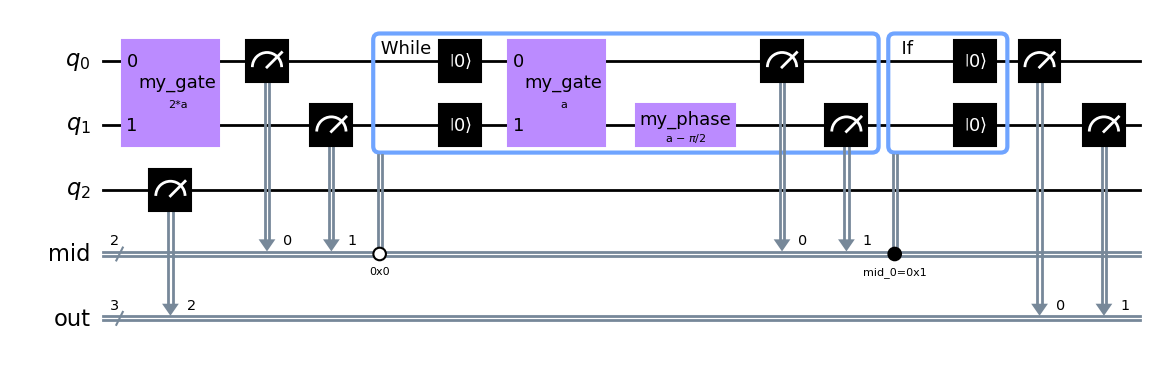

In [1]:
import qiskit.qasm3
 
program = """
    OPENQASM 3.0;
    include "stdgates.inc";
 
    input float[64] a;
    qubit[3] q;
    bit[2] mid;
    bit[3] out;
 
    let aliased = q[0:1];
 
    gate my_gate(a) c, t {
      gphase(a / 2);
      ry(a) c;
      cx c, t;
    }
    gate my_phase(a) c {
      ctrl @ inv @ gphase(a) c;
    }
 
    my_gate(a * 2) aliased[0], q[{1, 2}][0];
    measure q[0] -> mid[0];
    measure q[1] -> mid[1];
 
    while (mid == "00") {
      reset q[0];
      reset q[1];
      my_gate(a) q[0], q[1];
      my_phase(a - pi/2) q[1];
      mid[0] = measure q[0];
      mid[1] = measure q[1];
    }
 
    if (mid[0]) {
      let inner_alias = q[{0, 1}];
      reset inner_alias;
    }
 
    out = measure q;
"""
circuit = qiskit.qasm3.loads(program)
circuit.draw("mpl")

In [6]:
import qiskit.qasm3

ghz_with_advanced_features = """
    OPENQASM 3.0;

    input float[32] n = 5;
    bit[n + 1] c;
    qubit[n + 1] q;

    // Manually create the GHZ state instead of using a subroutine
    h q[0];
    for int i in [0:n - 1] {
        cnot q[i], q[i + 1];
    }

    c = measure q;
"""
circuit = qiskit.qasm3.loads(ghz_with_advanced_features)
circuit.draw("mpl")

QASM3ParsingError: 

In [21]:
from qiskit import QuantumCircuit
from qiskit import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeManilaV2

# service = QiskitRuntimeService()

# 1. A quantum circuit for preparing the quantum state (|00> + |11>)/rt{2}
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

# Run the sampler job locally using FakeManilaV2
backend = FakeManilaV2()
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
transpiled_qc = pm.run(qc)

# You can use a fixed seed to get fixed results.
options = {"simulator": {"seed_simulator": 42}}
sampler = Sampler(mode=backend, options=options)
 
result = sampler.run([transpiled_qc]).result()


print(result)
# print(f" > Quasi probability distribution: {result.quasi_dists}")


# # 2: Optimize problem for quantum execution.
# backend = service.least_busy(operational=True, simulator=False)
# pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
# isa_circuit = pm.run(bell)

# # 3. Execute using the Sampler primitive
# sampler = Sampler(mode=backend)
# sampler.options.default_shots = 1024  # Options can be set using auto-complete.
# job = sampler.run([isa_circuit])
# print(f"Job ID is {job.job_id()}")
# pub_result = job.result()[0]
# print(f"Counts for the meas output register: {pub_result.data.meas.get_counts()}")

PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=1024, num_bits=2>)), metadata={'shots': 1024, 'circuit_metadata': {}})], metadata={'version': 2})


/beegfs/home/lungyi45/.conda/envs/qmg-n/lib/python3.12/site-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


In [43]:
from qiskit_aer import AerSimulator
from qiskit.circuit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
import random
import numpy as np
 
def controlled_ry(control:int, target:int, digit:float):
    qc.cry(np.pi*digit, control, target)

random.seed(1)
weight_vector = [random.random() for _ in range(8)]
qubits = QuantumRegister(6)
clbits = ClassicalRegister(6 ,name="XXX")
qc = QuantumCircuit(qubits, clbits)

def reset_qubit(qubit, cbit):
    with qc.if_test((clbits[cbit], 1)):
        qc.x(qubit)

qc.ry(np.pi * weight_vector[0], 0)
qc.x(1)
qc.ry(np.pi * weight_vector[2], 2)
qc.ry(np.pi * weight_vector[4], 3)
qc.cx(0, 1)
controlled_ry(1, 2, weight_vector[3])
qc.cx(2, 3)
controlled_ry(0, 1, weight_vector[1])
qc.cx(1, 2)
controlled_ry(2, 3, weight_vector[5])

# measure atom 1 state:
qc.measure(qubits[0:2], clbits[0:2])
# measure atom 2 state and save:
qc.measure(qubits[2:4], clbits[2:4])

# Add a new atom existence ClassicalRegister:
atom_existence_CR = ClassicalRegister(bits=clbits[2:4], name="ZZZ")
qc.add_register(atom_existence_CR)
with qc.if_test((atom_existence_CR, 0)) as else_:
    pass
with else_:
    qc.ry(np.pi * weight_vector[6], 4)
    qc.x(5)
    qc.cx(4,5)
    controlled_ry(4, 5, weight_vector[7])

    # reset atom type qubit:
    reset_qubit(2, 2)
    reset_qubit(3, 3)

qc.measure(qubits[4:6], clbits[4:6])

# bond type ClassicalRegister:
# bond_type_CR = ClassicalRegister(bits=clbits[4:6]) 

# reset atom and bond
for bond_type_qubit, bond_type_clbit in zip([4,5], [4,5]):
    reset_qubit(bond_type_qubit, bond_type_clbit)


# Run the sampler job locally using AerSimulator.
# Session syntax is supported but ignored because local mode doesn't support sessions.
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_qc = pm.run(qc)
with Session(backend=aer_sim) as session:
    sampler = Sampler(mode=session)
    result = sampler.run([isa_qc]).result()

print(result)

PrimitiveResult([SamplerPubResult(data=DataBin(XXX=BitArray(<shape=(), num_shots=1024, num_bits=6>), ZZZ=BitArray(<shape=(), num_shots=1024, num_bits=2>)), metadata={'shots': 1024, 'circuit_metadata': {}})], metadata={'version': 2})


In [46]:
x = result[0].data.ZZZ
print(x.get_bitstrings())

['10', '00', '10', '10', '10', '10', '00', '10', '10', '10', '00', '00', '10', '00', '00', '00', '10', '10', '00', '00', '00', '00', '10', '00', '00', '00', '00', '10', '00', '00', '10', '00', '00', '10', '00', '00', '10', '10', '10', '10', '10', '10', '10', '00', '10', '00', '10', '10', '00', '00', '00', '10', '00', '00', '10', '10', '10', '10', '00', '10', '10', '00', '00', '10', '10', '10', '10', '10', '00', '00', '00', '00', '10', '10', '00', '00', '00', '00', '10', '00', '00', '10', '10', '10', '10', '00', '10', '00', '00', '10', '10', '00', '10', '00', '10', '10', '10', '10', '10', '00', '10', '00', '10', '00', '00', '00', '00', '10', '10', '00', '00', '10', '00', '00', '00', '10', '10', '00', '00', '00', '00', '10', '10', '10', '00', '10', '10', '00', '10', '10', '10', '00', '10', '10', '10', '00', '00', '00', '00', '10', '00', '10', '00', '10', '10', '00', '10', '00', '00', '00', '00', '00', '10', '00', '00', '00', '00', '00', '10', '10', '10', '00', '10', '10', '10', '10', '10